In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"
%matplotlib inline

# Get picture

## Generate pic by matrix

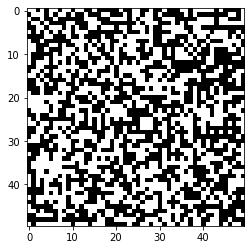

In [3]:
np.random.seed(10)
img0 = np.random.randint(0, 2, (50, 50))
plt.imshow(img0, cmap='gray')

## Use imread()

(722, 726, 3)


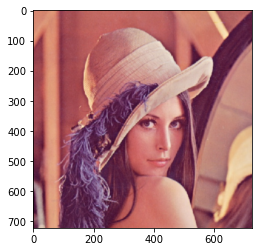

In [4]:
lena = cv2.imread('./lena.jpg')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
print(lena.shape)
plt.imshow(lena)

## Read from camera or video

`cv2.VideoCapture()`

read camera: `cv2.VideoCapture(0)`
read video: `cv2.VideoCapture(FilePath)`

True
<class 'numpy.ndarray'>


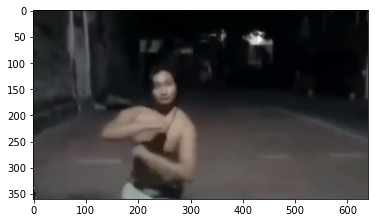

In [16]:
cap = cv2.VideoCapture('xbd.mp4')

# cap = cv2.VideoCapture(0)

if cap.isOpened():
    for i in range(2000):
        ret, frame = cap.read()
        if i == 0:
            print(ret)
            print(type(frame))

        if ret:
            pass
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
else:
    print('cannot open the video')

## Basic image processing

**Cutting**

(200, 200, 3)


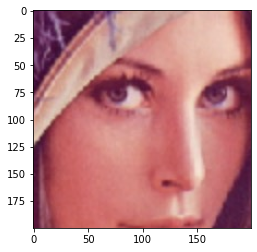

In [6]:
lena_cut = lena[300:500, 300:500]
print(lena_cut.shape)
plt.imshow(lena_cut)

**Color**

(722, 726)


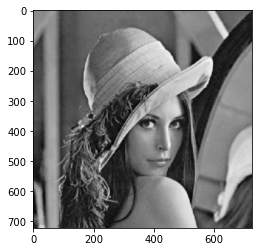

In [7]:
lena_grey = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
print(lena_grey.shape)
plt.imshow(lena_grey, cmap='gray')

(722, 726, 3)


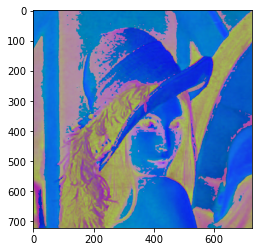

In [8]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
print(lena_hsv.shape)
plt.imshow(lena_hsv)

(722, 726, 3)


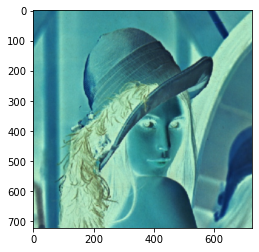

In [9]:
lena_inverse = 255 - lena
print(lena_inverse.shape)
plt.imshow(lena_inverse)

**Move, stretch and Rotate**

[warpAffline Reference](https://theailearner.com/tag/cv2-warpaffine/)

(722, 726, 3)


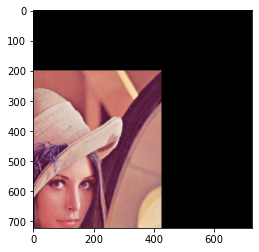

In [10]:
m = np.float32([[1, 0, -300], [0, 1, 200]])
plt.imshow(lena)
print(lena.shape)
lena_moved = cv2.warpAffine(lena, m, lena.shape[:2][::-1])
plt.imshow(lena_moved)

**Stack**

(722, 726, 3) (722, 726, 3)


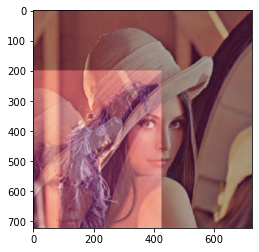

In [11]:
print(lena_moved.shape, lena.shape)
lena_stack = cv2.addWeighted(lena_moved, 0.4, lena, 0.7, 1)
plt.imshow(lena_stack)

**Concat**

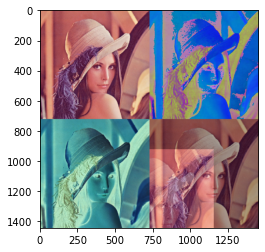

In [18]:
line1 = cv2.hconcat([lena, lena_hsv])
line2 = cv2.hconcat([lena_inverse, lena_stack])
plt.imshow(cv2.vconcat([line1, line2]))

## image filtering and conversion

In [12]:
kernel = np.zeros((3, 3))
kernel[0, :] = -1
kernel[1, :] = 0
kernel[2, :] = 1
print(kernel)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


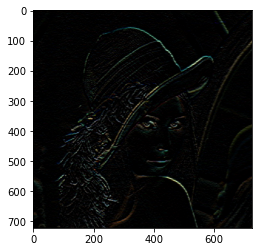

In [13]:
lena_filter = cv2.filter2D(lena, -1, kernel)
plt.imshow(lena_filter)